# **Prediction using Decision Tree Algorithm**
---
                                                                 Name : VISHNU E
                                                                 Organization : The Sparks Foundation
                                                                 Date : 14/08/2024

## **Problem Statement**
---


Create a Decision Tree Algorithm which would able to give the correct prediction according to the feed data and Visualize it.

### Importing Libraries

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing Data

In [2]:
Iris = pd.read_csv('Iris.csv')
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking unique values

Iris.nunique()

,0
Id,150
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


### Exploratory Data Analysis

In [4]:
# Droping coloumn 'Id'

df = Iris.drop(columns='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# checking for null values

df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [6]:
# summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# statistical summary of the dataframe

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

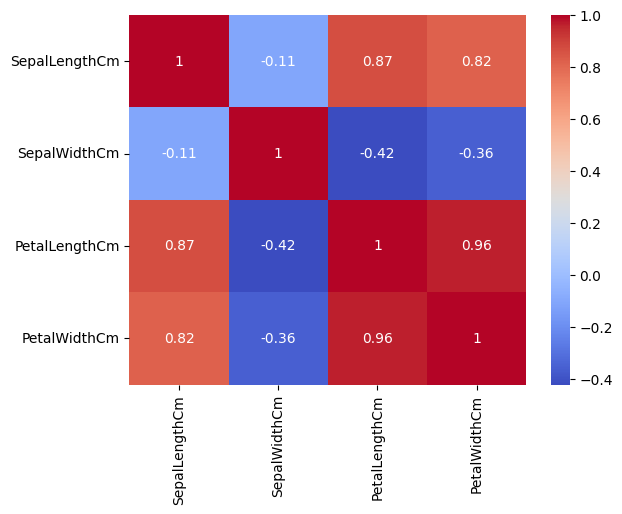

In [8]:
# correlation matrix

sns.heatmap((df.drop(columns = 'Species')).corr(), annot = True, cmap = 'coolwarm')

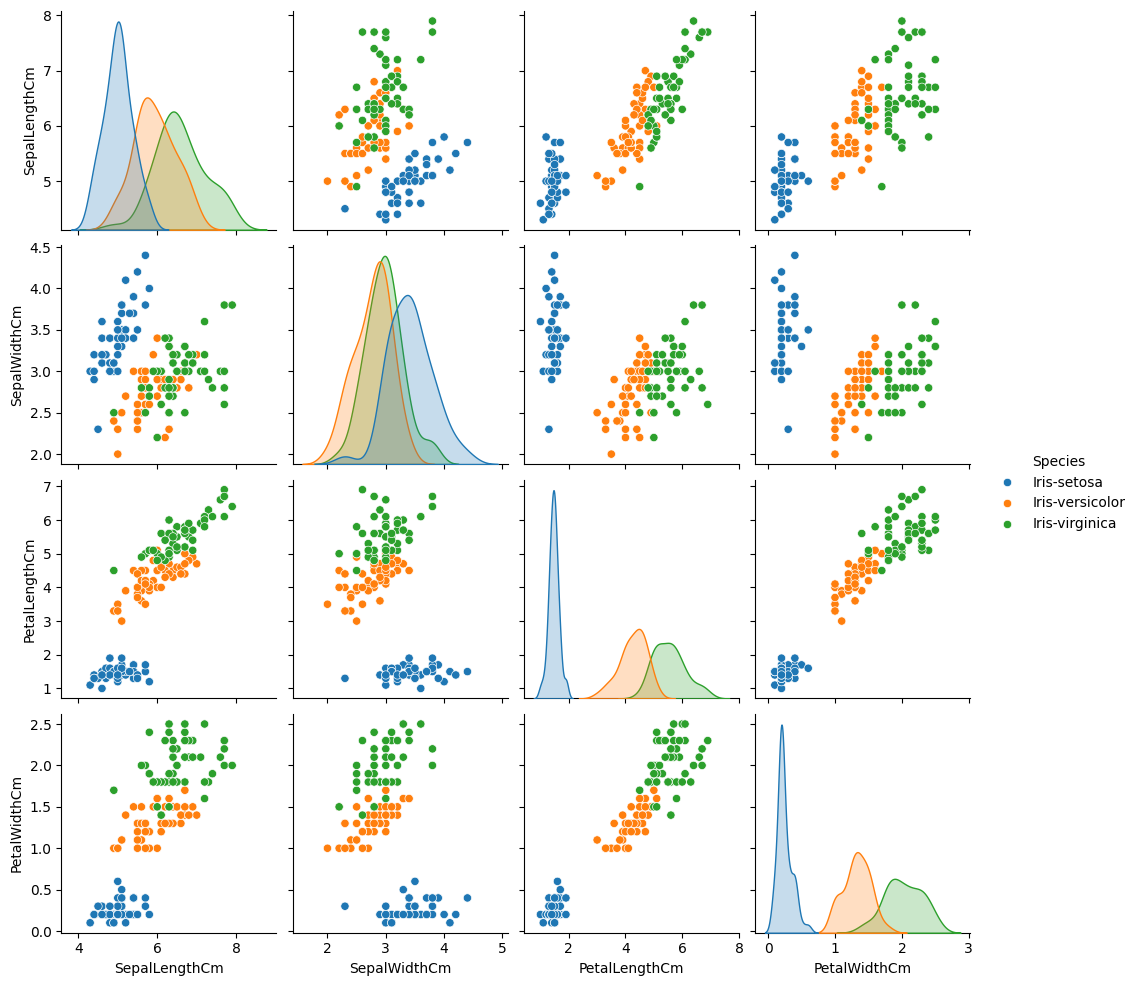

In [9]:
# pair plot of features

sns.pairplot(df, hue = 'Species')

### Dataset splitting

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns = 'Species')
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training and 20% testing

### Model training

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
# Dataframe of actual and predicted values

data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


### Model Testing

In [13]:
# classification report

classification_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_report)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



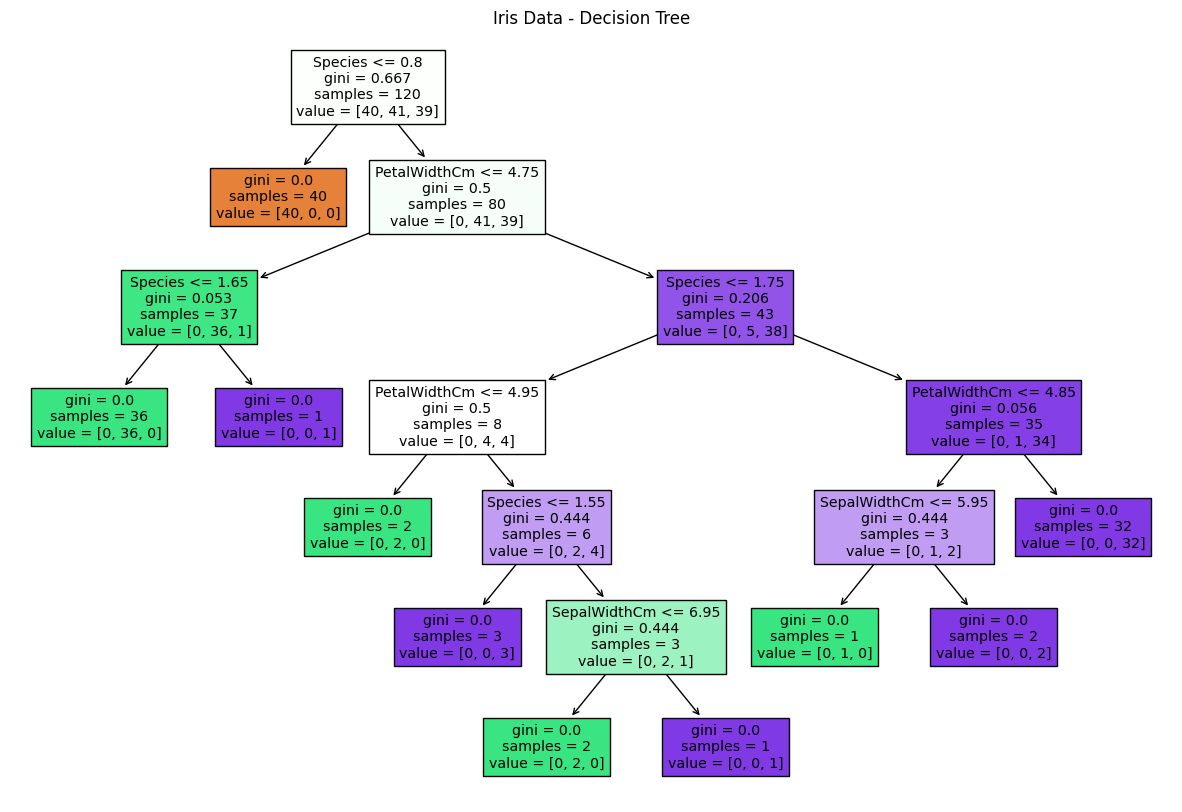

In [14]:
from sklearn import tree

plt.figure(figsize = (15,10))
tree.plot_tree(model,
               feature_names = df.iloc[:, 1:5].columns.values,
               filled = True);
plt.title("Iris Data - Decision Tree")
plt.show()

### Test points

In [15]:
# testing with new values

test_point = [[5.6, 2.9, 3.4, 1.9],
              [4.8, 2.4, 1.5, 0.8]]

predictions = model.predict(test_point)
print('Predicted Species : ',predictions)


Predicted Species :  ['Iris-virginica' 'Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
